In [1]:
#imorting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
quora_data = pd.read_csv("quora_dataset.csv")

In [3]:
quora_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
quora_data.shape

(404290, 6)

In [5]:
new_quora = quora_data.sample(50000)

In [6]:
new_quora.head()

,id,qid1,qid2,question1,question2,is_duplicate
216975,216975,323238,323239,How was your Jagriti Yatra experience?,What is it like to participate in the Jagriti ...,1
277884,277884,397071,397072,What are the benefits of marrying?,What are the benefits of marrying and not marr...,1
342746,342746,470772,470773,Can you trademark the same business name if it...,Can a US company with a registered trademark s...,1
172416,172416,33029,193418,Why do non-deserving people get everything and...,Why do some people struggle so hard in life an...,1
320375,320375,152732,86417,"Which is the best book for political, social, ...",Which is the best book for Indian history?,0


In [7]:
new_quora.shape

(50000, 6)

In [8]:
new_quora.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 216975 to 228645
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            50000 non-null  int64 
 1   qid1          50000 non-null  int64 
 2   qid2          50000 non-null  int64 
 3   question1     50000 non-null  object
 4   question2     50000 non-null  object
 5   is_duplicate  50000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.7+ MB


In [9]:
new_quora.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [10]:
new_quora = new_quora.fillna(" ")

In [11]:
new_quora.duplicated().sum()

0

0    31670
1    18330
Name: is_duplicate, dtype: int64
0    63.34
1    36.66
Name: is_duplicate, dtype: float64


<Axes: >

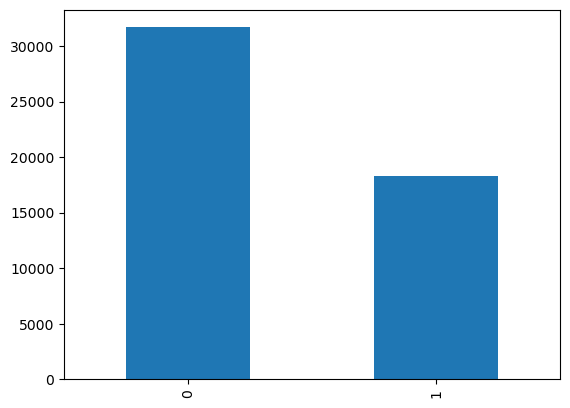

In [12]:
#distribution of duplicate and non-duplicate questions

print(new_quora["is_duplicate"].value_counts())
print((new_quora["is_duplicate"].value_counts()/new_quora["is_duplicate"].count())*100)
new_quora["is_duplicate"].value_counts().plot(kind = "bar")

In [13]:
#repeated questions
qid = pd.Series(new_quora["qid1"].tolist() + new_quora["qid2"].tolist())
print("Number of unique questions",np.unique(qid).shape[0])
x = qid.value_counts()>1
print("Number of questions getting repeated",x[x].shape[0])

Number of unique questions 89129
Number of questions getting repeated 7259


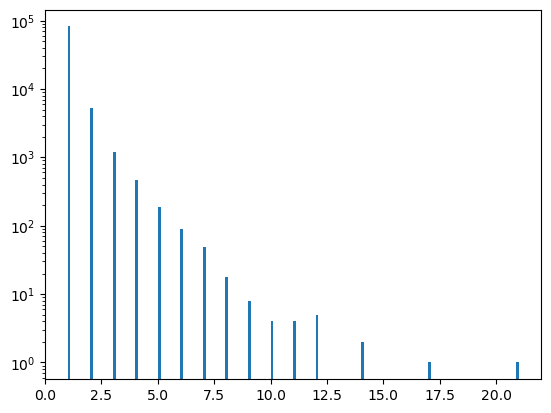

In [14]:
#repeated questions histogram
plt.hist(qid.value_counts().values, bins = 160)
plt.yscale("log")
plt.show()

In [15]:
#feature Engineering
new_quora["q1_len"] = new_quora["question1"].str.len() 
new_quora["q2_len"] = new_quora["question2"].str.len()

In [16]:
new_quora.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
216975,216975,323238,323239,How was your Jagriti Yatra experience?,What is it like to participate in the Jagriti ...,1,38,52
277884,277884,397071,397072,What are the benefits of marrying?,What are the benefits of marrying and not marr...,1,34,51
342746,342746,470772,470773,Can you trademark the same business name if it...,Can a US company with a registered trademark s...,1,67,111
172416,172416,33029,193418,Why do non-deserving people get everything and...,Why do some people struggle so hard in life an...,1,89,112
320375,320375,152732,86417,"Which is the best book for political, social, ...",Which is the best book for Indian history?,0,74,42


In [17]:
new_quora["q1_num_words"] = new_quora["question1"].apply(lambda row: len(row.split(" ")))
new_quora["q2_num_words"] = new_quora["question2"].apply(lambda row: len(row.split(" ")))

In [18]:
new_quora.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
216975,216975,323238,323239,How was your Jagriti Yatra experience?,What is it like to participate in the Jagriti ...,1,38,52,6,10
277884,277884,397071,397072,What are the benefits of marrying?,What are the benefits of marrying and not marr...,1,34,51,6,9
342746,342746,470772,470773,Can you trademark the same business name if it...,Can a US company with a registered trademark s...,1,67,111,12,22
172416,172416,33029,193418,Why do non-deserving people get everything and...,Why do some people struggle so hard in life an...,1,89,112,15,22
320375,320375,152732,86417,"Which is the best book for political, social, ...",Which is the best book for Indian history?,0,74,42,12,8


In [19]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row["question1"].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row["question2"].split(" ")))    
    return len(w1 & w2)

In [20]:
new_quora.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
216975,216975,323238,323239,How was your Jagriti Yatra experience?,What is it like to participate in the Jagriti ...,1,38,52,6,10
277884,277884,397071,397072,What are the benefits of marrying?,What are the benefits of marrying and not marr...,1,34,51,6,9
342746,342746,470772,470773,Can you trademark the same business name if it...,Can a US company with a registered trademark s...,1,67,111,12,22
172416,172416,33029,193418,Why do non-deserving people get everything and...,Why do some people struggle so hard in life an...,1,89,112,15,22
320375,320375,152732,86417,"Which is the best book for political, social, ...",Which is the best book for Indian history?,0,74,42,12,8


In [21]:
new_quora["common_words"] = new_quora.apply(common_words, axis = 1)

In [22]:
new_quora.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
216975,216975,323238,323239,How was your Jagriti Yatra experience?,What is it like to participate in the Jagriti ...,1,38,52,6,10,1
277884,277884,397071,397072,What are the benefits of marrying?,What are the benefits of marrying and not marr...,1,34,51,6,9,6
342746,342746,470772,470773,Can you trademark the same business name if it...,Can a US company with a registered trademark s...,1,67,111,12,22,9
172416,172416,33029,193418,Why do non-deserving people get everything and...,Why do some people struggle so hard in life an...,1,89,112,15,22,8
320375,320375,152732,86417,"Which is the best book for political, social, ...",Which is the best book for Indian history?,0,74,42,12,8,6


In [23]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row["question1"].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row["question2"].split(" ")))    
    return (len(w1) + len(w2))

In [24]:
new_quora["word_total"] = new_quora.apply(total_words, axis = 1)

In [25]:
new_quora.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total
216975,216975,323238,323239,How was your Jagriti Yatra experience?,What is it like to participate in the Jagriti ...,1,38,52,6,10,1,16
277884,277884,397071,397072,What are the benefits of marrying?,What are the benefits of marrying and not marr...,1,34,51,6,9,6,15
342746,342746,470772,470773,Can you trademark the same business name if it...,Can a US company with a registered trademark s...,1,67,111,12,22,9,31
172416,172416,33029,193418,Why do non-deserving people get everything and...,Why do some people struggle so hard in life an...,1,89,112,15,22,8,31
320375,320375,152732,86417,"Which is the best book for political, social, ...",Which is the best book for Indian history?,0,74,42,12,8,6,20


In [26]:
new_quora["word_share"] = round(new_quora["common_words"]/new_quora["word_total"],2)

In [27]:
new_quora.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share
216975,216975,323238,323239,How was your Jagriti Yatra experience?,What is it like to participate in the Jagriti ...,1,38,52,6,10,1,16,0.06
277884,277884,397071,397072,What are the benefits of marrying?,What are the benefits of marrying and not marr...,1,34,51,6,9,6,15,0.40
342746,342746,470772,470773,Can you trademark the same business name if it...,Can a US company with a registered trademark s...,1,67,111,12,22,9,31,0.29
172416,172416,33029,193418,Why do non-deserving people get everything and...,Why do some people struggle so hard in life an...,1,89,112,15,22,8,31,0.26
320375,320375,152732,86417,"Which is the best book for political, social, ...",Which is the best book for Indian history?,0,74,42,12,8,6,20,0.30


minimum characters 1
maximum characters 315
average num of characters 59


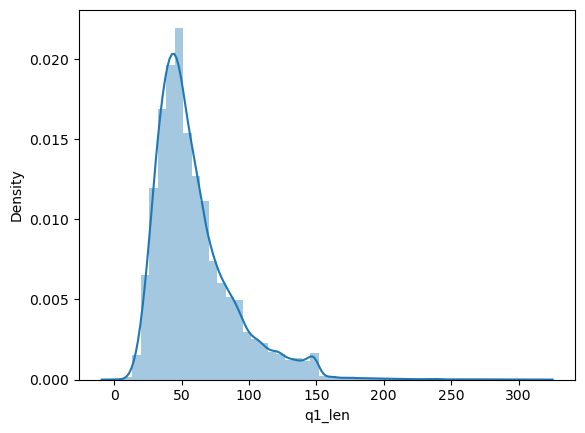

In [28]:
#no of characters
sns.distplot(new_quora["q1_len"])

print("minimum characters",new_quora["q1_len"].min())
print("maximum characters",new_quora["q1_len"].max())
print("average num of characters",int(new_quora["q1_len"].mean()))

minimum characters 1
maximum characters 315
average num of characters 59


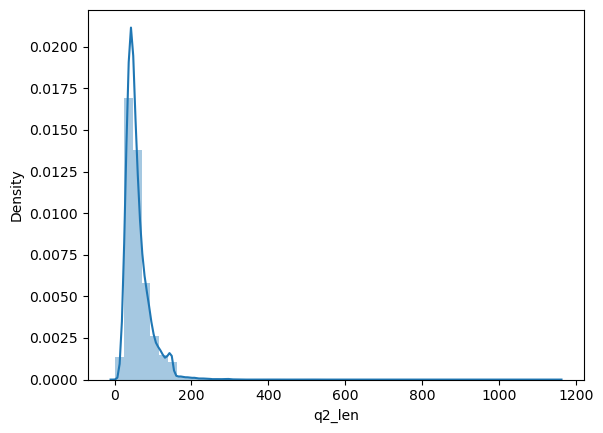

In [29]:
sns.distplot(new_quora["q2_len"])

print("minimum characters",new_quora["q1_len"].min())
print("maximum characters",new_quora["q1_len"].max())
print("average num of characters",int(new_quora["q1_len"].mean()))

minimum words 1
maximum words 68
average num of words 10


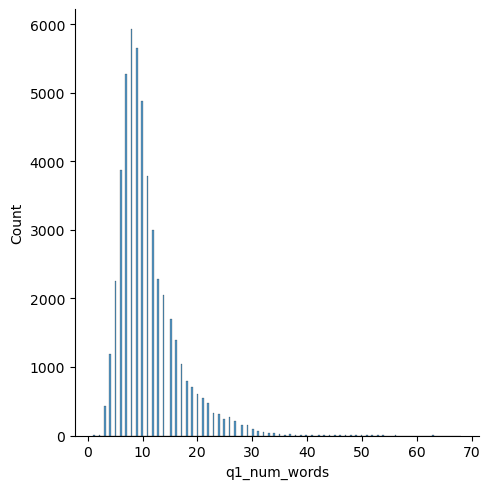

In [30]:
#no of words
sns.displot(new_quora["q1_num_words"])
print("minimum words",new_quora["q1_num_words"].min())
print("maximum words",new_quora["q1_num_words"].max())
print("average num of words",int(new_quora["q1_num_words"].mean()))

minimum words 1
maximum words 68
average num of words 10


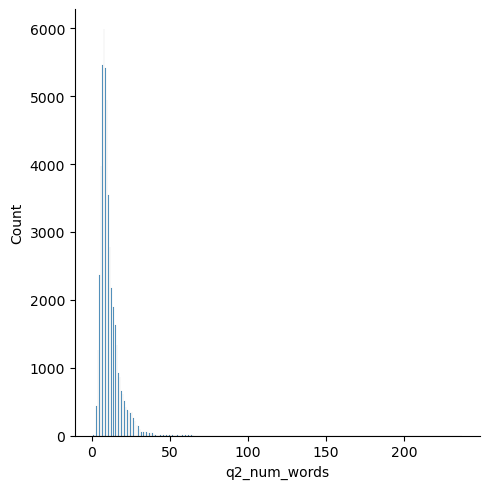

In [31]:
sns.displot(new_quora["q2_num_words"])
print("minimum words",new_quora["q1_num_words"].min())
print("maximum words",new_quora["q1_num_words"].max())
print("average num of words",int(new_quora["q1_num_words"].mean()))

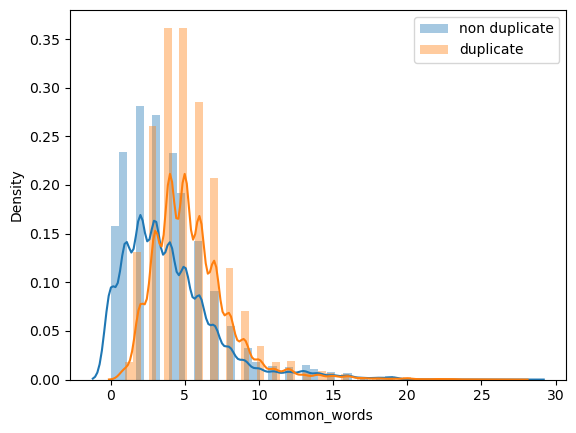

In [32]:
#common words
sns.distplot(new_quora[new_quora["is_duplicate"] == 0]["common_words"],label= "non duplicate")
sns.distplot(new_quora[new_quora["is_duplicate"] == 1]["common_words"],label= "duplicate")
plt.legend()
plt.show()

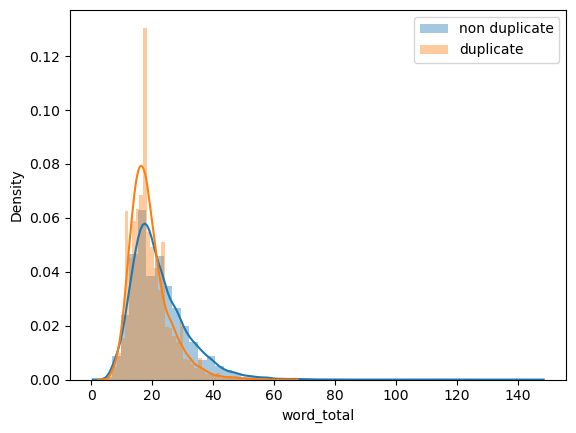

In [33]:
#total words
sns.distplot(new_quora[new_quora["is_duplicate"] == 0]["word_total"],label= "non duplicate")
sns.distplot(new_quora[new_quora["is_duplicate"] == 1]["word_total"],label= "duplicate")
plt.legend()
plt.show()

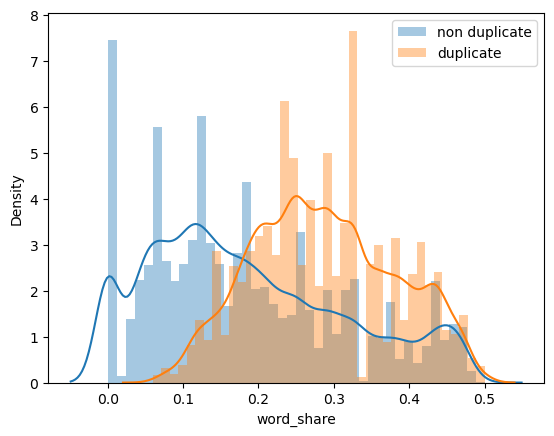

In [34]:
#word share
sns.distplot(new_quora[new_quora["is_duplicate"] == 0]["word_share"],label= "non duplicate")
sns.distplot(new_quora[new_quora["is_duplicate"] == 1]["word_share"],label= "duplicate")
plt.legend()
plt.show()

In [35]:
quora_ques = new_quora[["question1","question2"]]

In [36]:
quora_ques.head()

,question1,question2
216975,How was your Jagriti Yatra experience?,What is it like to participate in the Jagriti ...
277884,What are the benefits of marrying?,What are the benefits of marrying and not marr...
342746,Can you trademark the same business name if it...,Can a US company with a registered trademark s...
172416,Why do non-deserving people get everything and...,Why do some people struggle so hard in life an...
320375,"Which is the best book for political, social, ...",Which is the best book for Indian history?


In [37]:
final_quora_ques = new_quora.drop(columns=["id","qid1","qid2","question1","question2"])

In [38]:
final_quora_ques.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share
216975,1,38,52,6,10,1,16,0.06
277884,1,34,51,6,9,6,15,0.40
342746,1,67,111,12,22,9,31,0.29
172416,1,89,112,15,22,8,31,0.26
320375,0,74,42,12,8,6,20,0.30


In [39]:
final_quora_ques.shape

(50000, 8)

In [40]:
#merge texts
questions = list(quora_ques["question1"]) + list(quora_ques["question2"])

cv = CountVectorizer(max_features = 3000)

q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [41]:
quora_ques1 = pd.DataFrame(q1_arr, index = quora_ques.index)

quora_ques2 = pd.DataFrame(q2_arr, index = quora_ques.index)

questions_quora = pd.concat([quora_ques1, quora_ques2], axis = 1)

In [42]:
questions_quora.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
216975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342746,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
172416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
320375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
questions_quora.shape

(50000, 6000)

In [44]:
final_quora_ques = pd.concat([final_quora_ques, questions_quora], axis = 1)

In [45]:
final_quora_ques.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
216975,1,38,52,6,10,1,16,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
277884,1,34,51,6,9,6,15,0.40,0,0,...,0,0,0,0,0,0,0,0,0,0
342746,1,67,111,12,22,9,31,0.29,0,0,...,2,0,0,0,0,0,0,0,0,0
172416,1,89,112,15,22,8,31,0.26,0,0,...,0,0,0,0,0,0,0,0,0,0
320375,0,74,42,12,8,6,20,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
final_quora_ques.shape

(50000, 6008)

In [47]:
X_train,X_test,y_train,y_test = train_test_split(final_quora_ques.iloc[:,0:-1].values, final_quora_ques.iloc[:,-1].values, test_size = 0.2, random_state = 2)

In [48]:
forest = RandomForestClassifier()

forest.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
y_pred = forest.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred)

0.9996

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9996
           1       0.00      0.00      0.00         4

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



In [52]:
xgb = XGBClassifier()

xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [53]:
y_pred = xgb.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred)

0.9998

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9996
           1       1.00      0.50      0.67         4

    accuracy                           1.00     10000
   macro avg       1.00      0.75      0.83     10000
weighted avg       1.00      1.00      1.00     10000

